In [2]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

### Polynomial interpolation Example

In [21]:

x=[0,1,-1,2,-2] # interpolation points
f=[-5,-3,-15,39,-9] 
V= np.vander(x,increasing=True)  # Creates the Vandermonde matrix.
c=np.linalg.lstsq(V,f,rcond=-1)[0] # computes the coefficients 
print(c)


[-5.  4. -7.  2.  3.]


Polynomial approximation of $e^x$

$\begin{align*}
f(x) = e^x \approx \sum_{k=0}^{n} c_{k} x^{k} = p_n(x)
\end{align*}$

We consider points $x_{1},x_{2},...,x_{n+1}$ in the interval $[-1,1]$ with interpolation condition $f(x_j) = s_n(x_j)$ for $j = 1,2,...,n+1$


Thus we have that 

$\begin{align*}
f(x_1) = p_n(x_1)=c_{0}x_{1}^{0} + c_{1}x_{1}^{1}+c_{2}x_{1}^{2}+\cdots+c_{n}x_{1}^{n}\\
f(x_2) = p_n(x_2)=c_{0}x_{2}^{0} + c_{1}x_{2}^{1}+c_{2}x_{2}^{2}+\cdots+c_{n}x_{2}^{n}\\
f(x_3) = p_n(x_3)=c_{0}x_{3}^{0}+c_{1}x_{3}^{1}+c_{2}x_{3}^{2}+\cdots+c_{n}x_{3}^{n}\\
\vdots   \\
f(x_n+1) = p_n(x_n+1)=c_{0}x_{n+1}^{0} + c_{1}x_{n+1}^{1}+c_{2}x_{n+1}^{2}+\cdots+c_{n}x_{n+1}^{n}\\
\end{align*}$

$\begin{bmatrix}
f(x_1) \\
f(x_2)\\
f(x_3)\\
.\\
.\\
f(x_n+1)
\end{bmatrix}$ =
$\begin{bmatrix}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{n}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{n}\\
1 & x_{3} & x_{3}^{2} & \cdots & x_{3}^{n}\\
\vdots & \vdots & \vdots & \cdots & \vdots\\
1 & x_{n+1} & x_{n+1}^{2} & \cdots & x_{n+1}^{n}
\end{bmatrix}$
$\begin{bmatrix}
c_0 \\
c_1\\
c_2)\\
.\\
.\\
c_n+1)
\end{bmatrix}$ 

Therefore, we have that $$f = V c$$

Where $V$ is the Vandermonde Matrix and $c$ is the Matrix of the coefficients


The code below computes the coefficients $c_k$

In [14]:

x = np.linspace(-1,1,10)  # interpolation points
n = 10 # Number of expansion terms in the series
V= np.vander(x,n,increasing=True)  # Creates the Vandermonde matrix.
f=np.exp(x) 
c=np.linalg.lstsq(V,f,rcond=-1)[0] # computes the coefficients 
print(c)

[1.00000000e+00 1.00000000e+00 4.99999993e-01 1.66666666e-01
 4.16667576e-02 8.33334158e-03 1.38851515e-03 1.98378793e-04
 2.53688482e-05 2.80721794e-06]


We now define a function exp_error(m,n),this function takes in the parameter m which is the total number of interpolation points and $n$ which is the number of expansion terms in the series. It then computes the coefficients $c$, find $p_n(x)=\sum_{k=0}^{n} c_{k} x^{k} $ and computes the error of approximation $\,$ 

$error_n = || f(x) - p_n(x) ||_{\infty}$ $\approx \max_{{j=1,2,...,1000}} | f(xx_j) - p_n(xx_j)|$

In [15]:
def exp_error(m,n):
    x = np.linspace(-1,1,m)  # interpolation points
    V= np.vander(x,n,increasing=True)  # Creates the Vandermonde matrix.
    f=np.exp(x)
    c=np.linalg.lstsq(V,f,rcond=-1)[0] # computing the coefficients
    
    #checking the error with more interpolation points 
    xx=np.linspace(-1,1,1000)  
    ff=np.exp(xx)
    p=0
    for j in range(0,len(c)): #Sum the first n terms of the series
        p=p+(xx**j) * c[j]
    E=max(abs(ff-p)) # computes the error
    return(E)


### We now investigate the error in the polynomial approximation when we use a square matrix $(n \times n)$ and when we use an overdetermined system $2n \times n$

## For  the case $(n \times n)$

In [6]:
def plt_error1():
    'This function computes the error for the case n*n'
    Tn=[] #intialise list to append the error values at different values of n
    for n in range(2,20):
        T=exp_error(n,n) # computes the error
        Tn.append(T)  
    return(Tn)
    
    

In [49]:
# Plotting the Error using semilogy 

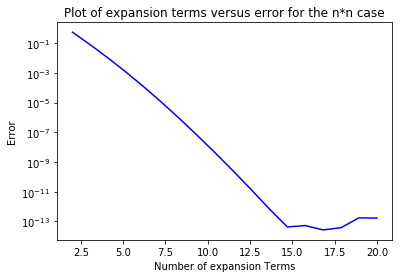

In [8]:
y=plt_error1()
x=np.linspace(2,20,18)
plt.semilogy(x,y,'b')
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for the n*n case')
plt.savefig('Plot_of_error_case1.png')
plt.show()



## For  the case $(2n \times n)$

In [10]:

def plt_error2():
    'This function computes the error for the case 2n*n'
    Dn=[] #intialise list to append the error values at different values of n
    for n in range(2,20):
        D=exp_error(2*n,n) # computes the error
        Dn.append(D)  
    return(Dn)
    

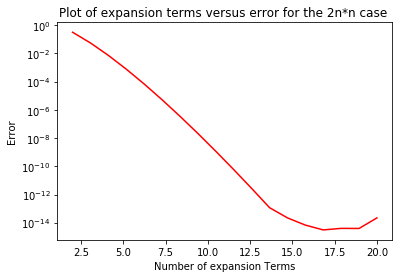

In [11]:
y_2=plt_error2()
xx=np.linspace(2,20,18)
plt.semilogy(xx,y_2,'r')
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for the 2n*n case ')
plt.savefig('Plot_of_error_case2.png')
plt.show()

In [12]:
##Comparing the plots for n*n and (2*n)*n

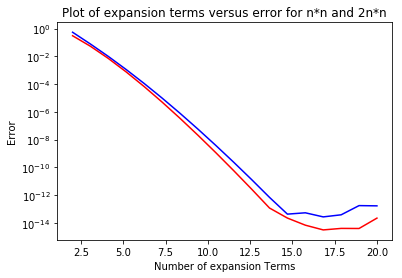

In [13]:

plt.semilogy(x,y,'b',xx,y_2,'r')
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error for n*n and 2n*n')
plt.savefig('Plot_of_error_both_cases.png')
plt.legend
plt.show()